# **Sampling and Reconstruction of Signals Analysis of Aliasing Effects and Proper Signal Reconstruction. Coding and Decoding Digital Signals - Krzysztof Wąsik**

In the first task, we explore sampling and reconstruction by illustrating the aliasing phenomenon when a signal is sampled below the Nyquist rate. In the second task, we analyze coding and decoding of digital signals using DCT-based compression to study the trade-off between compression efficiency and signal fidelity.

## **1. Sampling and Reconstruction – Aliasing Demonstration for a Square Wave**

In this section, a square wave of 20 Hz is sampled at 18 Hz. Since the sampling frequency is below the Nyquist rate, aliasing occurs and the reconstructed signal is distorted.

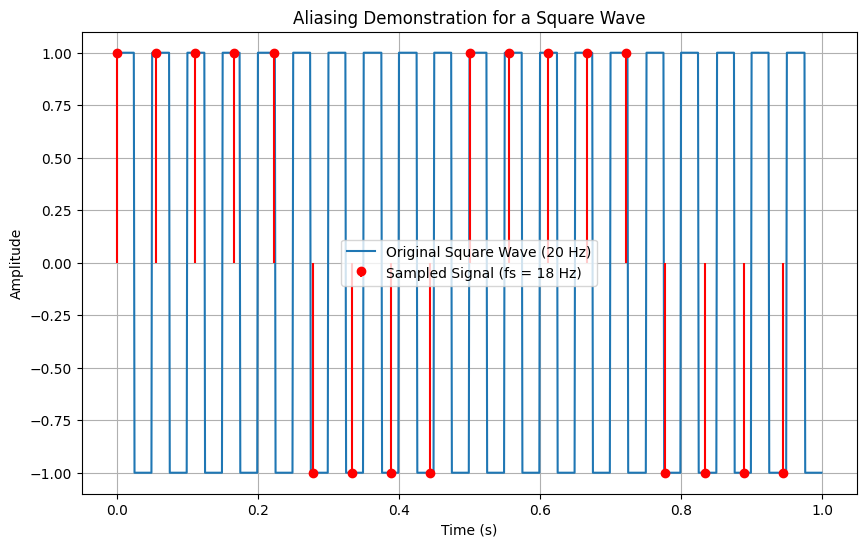

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

f_signal = 20
t_high_res = np.linspace(0, 1, 1000, endpoint=False)
original_signal = square(2 * np.pi * f_signal * t_high_res)

fs = 18
t_sample = np.arange(0, 1, 1/fs)
sampled_signal = square(2 * np.pi * f_signal * t_sample)

plt.figure(figsize=(10, 6))
plt.plot(t_high_res, original_signal, label='Original Square Wave (20 Hz)')
plt.stem(t_sample, sampled_signal, linefmt='r-', markerfmt='ro', basefmt=' ', label='Sampled Signal (fs = 18 Hz)')
plt.title('Aliasing Demonstration for a Square Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## **2. Coding and Decoding – DCT Compression Analysis**

We analyze DCT-based compression of the signal [4, 8, 12, 16, 20, 24]. The signal is compressed using thresholds of 2, 4, and 6. For each threshold, the reconstructed signal, compression ratio, and mean squared error (MSE) are computed to quantify the trade-off between compression and signal distortion.

Original Signal: [ 4  8 12 16 20 24]

Threshold: 2
Reconstructed Signal: [ 4.71  7.2  11.51 16.49 20.8  23.29]
Compression Ratio: 3.0
Mean Squared Error (MSE): 0.46
--------------------------------------------------
Threshold: 4
Reconstructed Signal: [ 4.71  7.2  11.51 16.49 20.8  23.29]
Compression Ratio: 3.0
Mean Squared Error (MSE): 0.46
--------------------------------------------------
Threshold: 6
Reconstructed Signal: [ 4.71  7.2  11.51 16.49 20.8  23.29]
Compression Ratio: 3.0
Mean Squared Error (MSE): 0.46
--------------------------------------------------


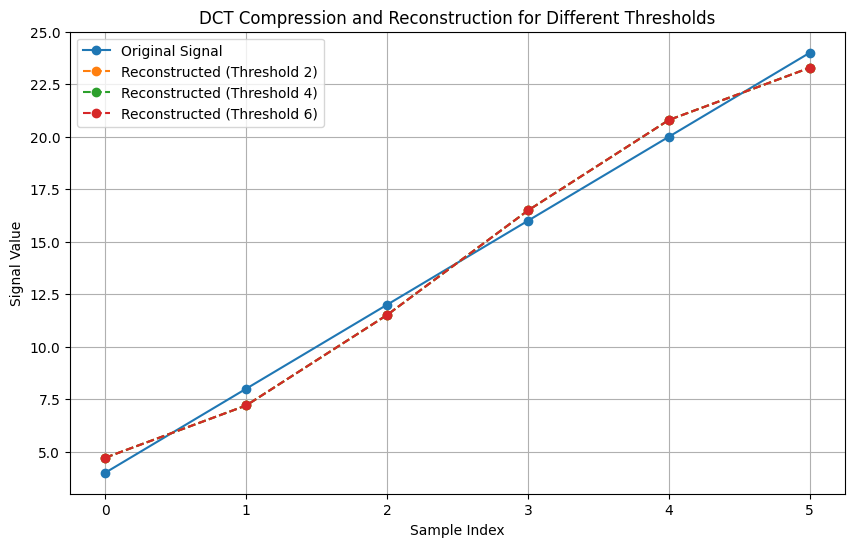

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

original_signal = np.array([4, 8, 12, 16, 20, 24])
thresholds = [2, 4, 6]

print('Original Signal:', original_signal)
print()

def dct_compression(signal, threshold):
    dct_coeffs = dct(signal, norm='ortho')
    compressed_coeffs = np.where(np.abs(dct_coeffs) > threshold, dct_coeffs, 0)
    nonzero_count = np.count_nonzero(compressed_coeffs)
    compression_ratio = len(signal) / nonzero_count if nonzero_count > 0 else np.inf
    reconstructed_signal = idct(compressed_coeffs, norm='ortho')
    mse = np.mean((signal - reconstructed_signal) ** 2)
    return reconstructed_signal, compression_ratio, mse

for threshold in thresholds:
    reconstructed_signal, comp_ratio, mse = dct_compression(original_signal, threshold)
    print('Threshold:', threshold)
    print('Reconstructed Signal:', np.round(reconstructed_signal, 2))
    print('Compression Ratio:', np.round(comp_ratio, 2))
    print('Mean Squared Error (MSE):', np.round(mse, 2))
    print('-' * 50)

plt.figure(figsize=(10, 6))
plt.plot(original_signal, 'o-', label='Original Signal')
for threshold in thresholds:
    reconstructed_signal, comp_ratio, mse = dct_compression(original_signal, threshold)
    plt.plot(reconstructed_signal, 'o--', label=f'Reconstructed (Threshold {threshold})')
plt.title('DCT Compression and Reconstruction for Different Thresholds')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)
plt.show()

# **Conclusions**

- **Sampling and Reconstruction**: The aliasing phenomenon is effectively demonstrated by sampling a 20 Hz square wave at 18 Hz. This undersampling leads to a significant distortion in the reconstructed signal, underscoring the importance of adhering to the Nyquist criterion.

- **Coding and Decoding**: The DCT-based compression analysis shows that lower threshold values retain more of the original signal's details (yielding a lower MSE), but at the cost of a lower compression ratio. Conversely, higher thresholds provide better compression but result in increased reconstruction errors.